# Analyse exploratoire des fichiers
---

## Importation des librairies

In [1]:
# Dependencies import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## Fichier `extrait_sirh`

In [2]:
# File loading
df_sirh = pd.read_csv("./data/extrait_sirh.csv")
df_sirh.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [3]:
# Shape of the dataframe
print(f"The file has : {df_sirh.shape[1]} columns | {df_sirh.shape[0]} rows")

The file has : 12 columns | 1470 rows


In [4]:
print("Number of NaN in each column\n")
print(df_sirh.isna().sum())

Number of NaN in each column

id_employee                       0
age                               0
genre                             0
revenu_mensuel                    0
statut_marital                    0
departement                       0
poste                             0
nombre_experiences_precedentes    0
nombre_heures_travailless         0
annee_experience_totale           0
annees_dans_l_entreprise          0
annees_dans_le_poste_actuel       0
dtype: int64


In [5]:
df_sirh['genre'].value_counts()

genre
M    882
F    588
Name: count, dtype: int64

In [6]:
df_sirh['statut_marital'].value_counts()

statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

In [7]:
df_sirh['departement'].value_counts()

departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

In [8]:
df_sirh['poste'].value_counts()

poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

In [9]:
print(df_sirh['id_employee'].is_unique)

True


In [10]:
df_sirh.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000


In [11]:
df_sirh['nombre_heures_travailless'].value_counts()

nombre_heures_travailless
80    1470
Name: count, dtype: int64

Le dataframe est propre, aucune valeur NaN. 
Par contre la colonne `nombre_heures_travailless` n'a qu'une valeur, ce qui est inutile pour du ML.

De plus aucun outlier ne semble apparaitre avec le `describe`

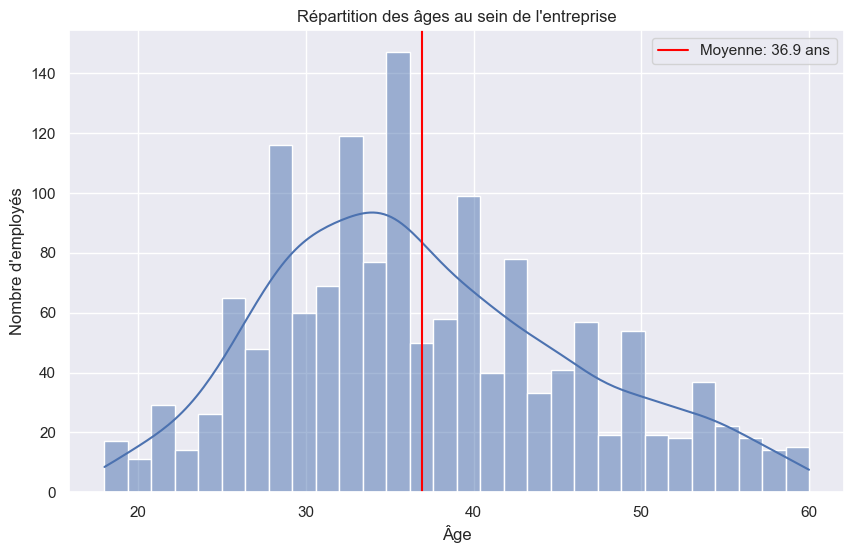

In [12]:
# Better looking graph
sns.set_theme()

plt.figure(figsize=(10, 6))
mean_age = df_sirh['age'].mean()

sns.histplot(data=df_sirh, x='age', kde=True, bins=30)
plt.axvline(mean_age, color='red', label=f'Moyenne: {mean_age:.1f} ans')
plt.title("Répartition des âges au sein de l'entreprise")
plt.xlabel("Âge")
plt.ylabel("Nombre d'employés")
plt.legend()

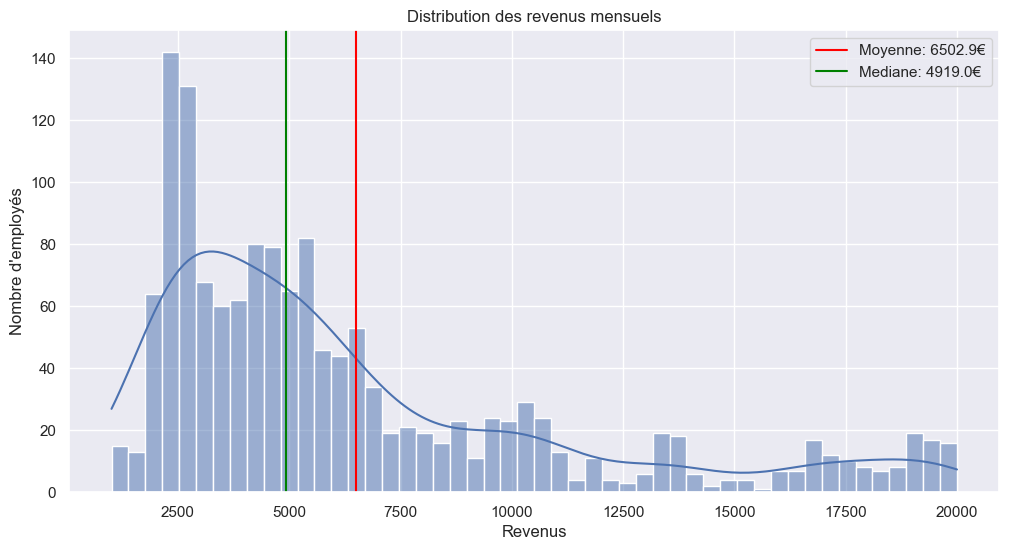

In [13]:
plt.figure(figsize=(12, 6))
mean_revenu = df_sirh['revenu_mensuel'].mean()
median_revenu = df_sirh['revenu_mensuel'].median()

sns.histplot(data=df_sirh, x='revenu_mensuel', kde=True, bins=50)

plt.axvline(mean_revenu, color='red', label=f'Moyenne: {mean_revenu:.1f}€')
plt.axvline(median_revenu, color='green', label=f'Mediane: {median_revenu:.1f}€')
plt.title("Distribution des revenus mensuels")
plt.xlabel("Revenus")
plt.ylabel("Nombre d'employés")
plt.legend()

Text(0, 0.5, 'Revenu mensuel')

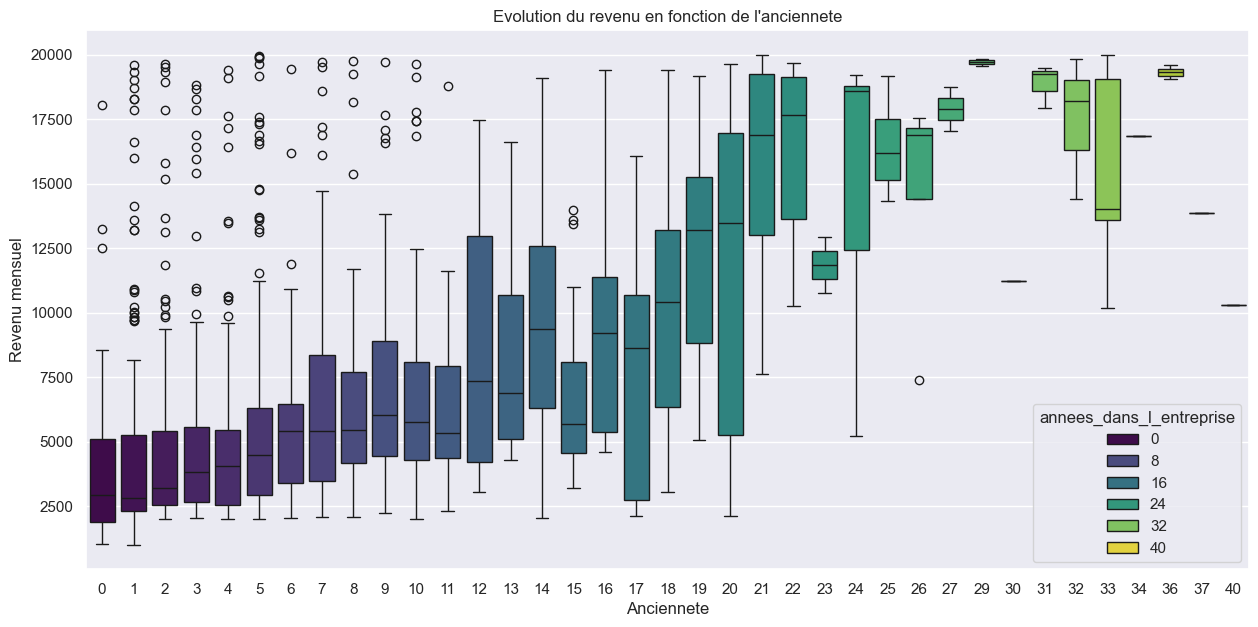

In [14]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_sirh, x='annees_dans_l_entreprise', y='revenu_mensuel', palette='viridis', hue='annees_dans_l_entreprise')
plt.title("Evolution du revenu en fonction de l'anciennete")
plt.xlabel("Anciennete")
plt.ylabel("Revenu mensuel")

Text(0, 0.5, 'Revenu mensuel')

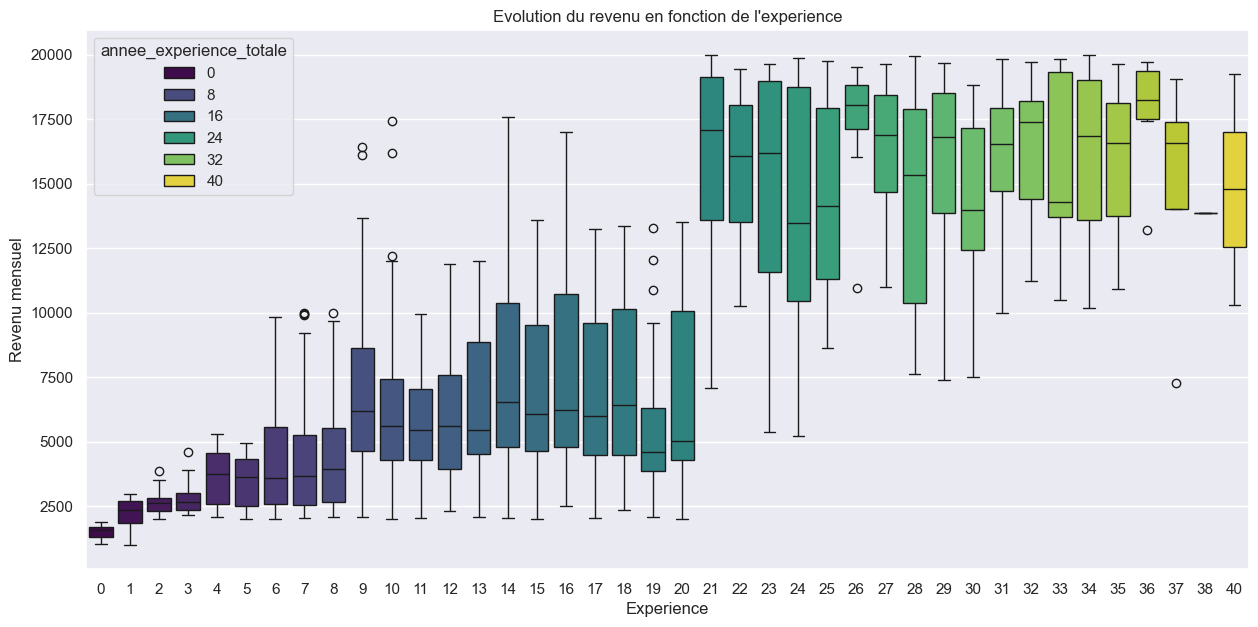

In [15]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_sirh, x='annee_experience_totale', y='revenu_mensuel', palette='viridis', hue='annee_experience_totale')
plt.title("Evolution du revenu en fonction de l'experience")
plt.xlabel("Experience")
plt.ylabel("Revenu mensuel")

Text(0.5, 1.0, 'Revenu vs Expérience Totale\n(Plus linéaire/cohérent)')

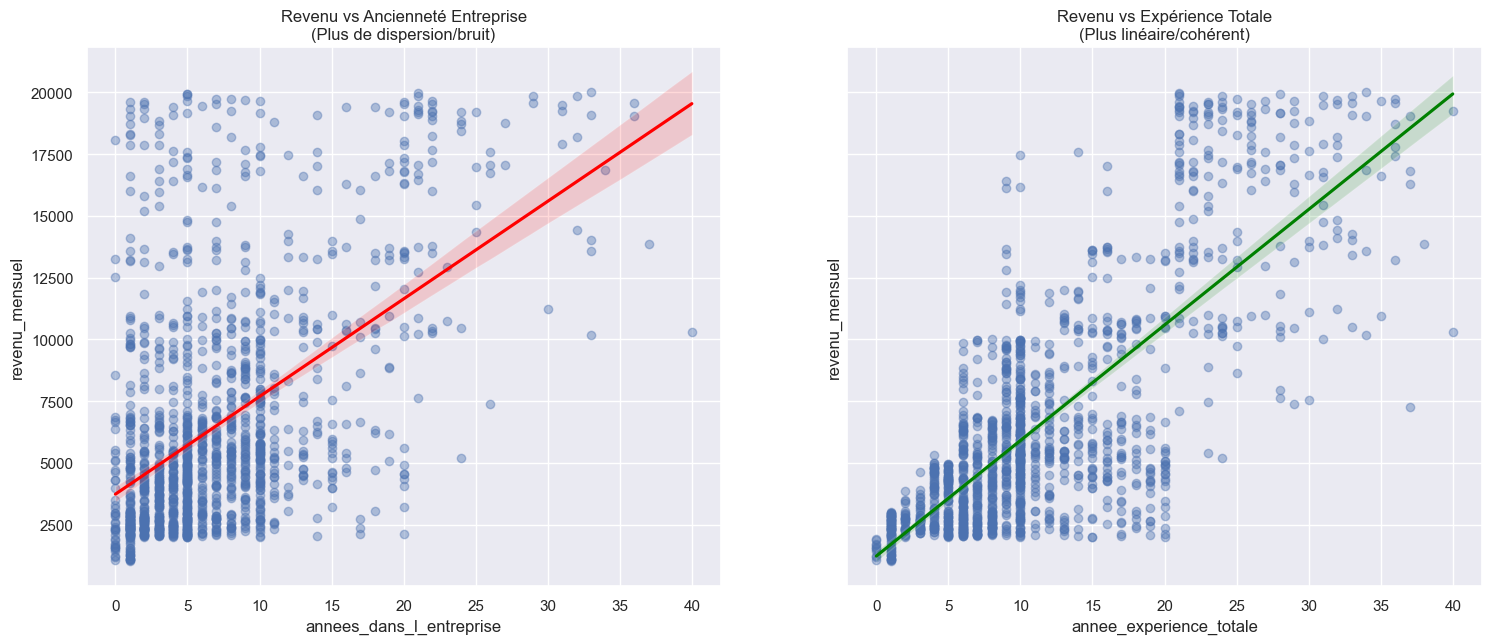

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# 1. Revenu vs Ancienneté dans la boîte
sns.regplot(
    ax=axes[0],
    data=df_sirh,
    x="annees_dans_l_entreprise",
    y="revenu_mensuel",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
)
axes[0].set_title("Revenu vs Ancienneté Entreprise\n(Plus de dispersion/bruit)")

# 2. Revenu vs Expérience Totale
sns.regplot(
    ax=axes[1],
    data=df_sirh,
    x="annee_experience_totale",
    y="revenu_mensuel",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "green"},
)
axes[1].set_title("Revenu vs Expérience Totale\n(Plus linéaire/cohérent)")

---
## Fichier `extrait_sondage`

In [17]:
df_sondage = pd.read_csv("./data/extrait_sondage.csv")
df_sondage.head()

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [18]:
# Shape of the dataframe
print(f"The file has : {df_sondage.shape[1]} columns | {df_sondage.shape[0]} rows")

The file has : 12 columns | 1470 rows


In [19]:
print("Number of NaN in each column\n")
print(df_sondage.isna().sum())

Number of NaN in each column

a_quitte_l_entreprise                  0
nombre_participation_pee               0
nb_formations_suivies                  0
nombre_employee_sous_responsabilite    0
code_sondage                           0
distance_domicile_travail              0
niveau_education                       0
domaine_etude                          0
ayant_enfants                          0
frequence_deplacement                  0
annees_depuis_la_derniere_promotion    0
annes_sous_responsable_actuel          0
dtype: int64


In [20]:
df_sondage['a_quitte_l_entreprise'].value_counts()

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

In [21]:
df_sondage['domaine_etude'].value_counts()

domaine_etude
Infra & Cloud              606
Transformation Digitale    464
Marketing                  159
Entrepreunariat            132
Autre                       82
Ressources Humaines         27
Name: count, dtype: int64

In [22]:
df_sondage['ayant_enfants'].value_counts()

ayant_enfants
Y    1470
Name: count, dtype: int64

In [23]:
df_sondage['frequence_deplacement'].value_counts()

frequence_deplacement
Occasionnel    1043
Frequent        277
Aucun           150
Name: count, dtype: int64

In [24]:
df_sondage['niveau_education'].value_counts()

niveau_education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [25]:
df_sondage['code_sondage'].value_counts()

code_sondage
2068    1
1       1
2       1
4       1
5       1
       ..
23      1
22      1
21      1
20      1
19      1
Name: count, Length: 1470, dtype: int64

In [26]:
print(df_sondage['code_sondage'].is_unique)

True


In [27]:
df_sondage.describe()

,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,2.187755,4.123129
std,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,3.222430,3.568136
min,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,1.000000,3.000000
75%,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,3.000000,7.000000
max,3.000000,6.000000,1.0,2068.000000,29.000000,5.000000,15.000000,17.000000


Le fichier est propre, aucune valeur NaN. 

La colonne `colonne_sondage` va servir à faire la jointure avec le fichier `extrait_sirh`

La colonne `nombre_employee_sous_responsabilite` est inutile pour le ML car seulement la valeur **1** est présente, ainsi que la colonne `ayant_enfants` avec comme valeur unique **Y**

Text(0, 0.5, "Nombre d'employés")

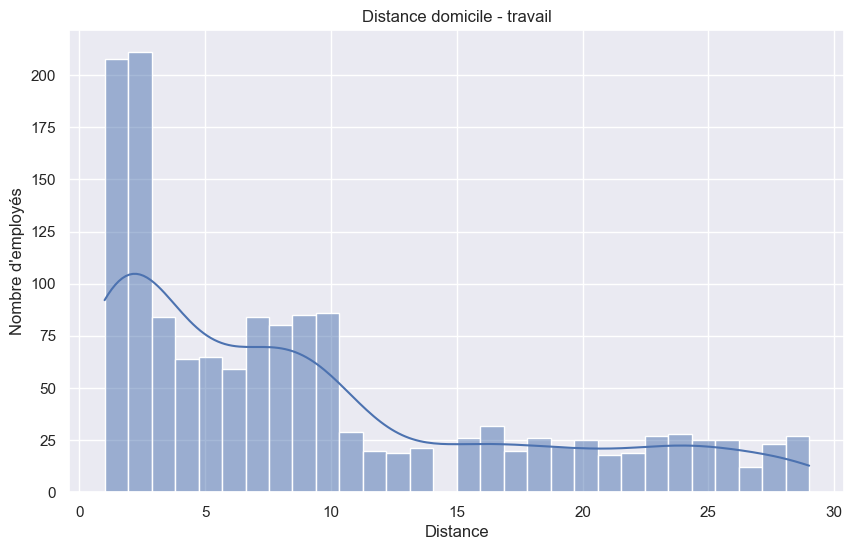

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sondage, x='distance_domicile_travail', kde=True, bins=30)
plt.title("Distance domicile - travail")
plt.xlabel("Distance")
plt.ylabel("Nombre d'employés")

Text(0, 0.5, "Nombre d'employés")

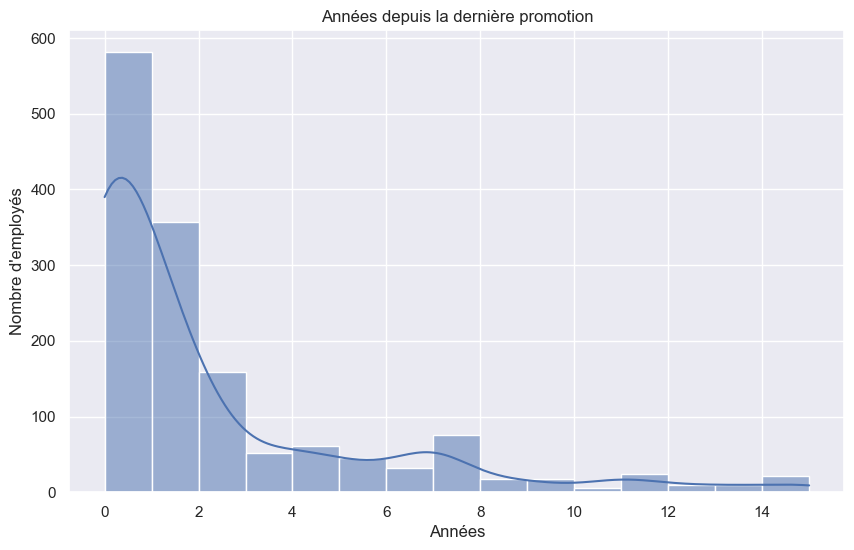

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sondage, x='annees_depuis_la_derniere_promotion', kde=True, bins=15)
plt.title("Années depuis la dernière promotion")
plt.xlabel("Années")
plt.ylabel("Nombre d'employés")

---

## Fichier `extrait_eval`

In [30]:
df_eval = pd.read_csv('./data/extrait_eval.csv')
df_eval.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [31]:
# Shape of the dataframe
print(f"The file has : {df_eval.shape[1]} columns | {df_eval.shape[0]} rows")

The file has : 10 columns | 1470 rows


In [32]:
print("Number of NaN in each column\n")
print(df_eval.isna().sum())

Number of NaN in each column

satisfaction_employee_environnement          0
note_evaluation_precedente                   0
niveau_hierarchique_poste                    0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
eval_number                                  0
note_evaluation_actuelle                     0
heure_supplementaires                        0
augementation_salaire_precedente             0
dtype: int64


In [33]:
df_eval['heure_supplementaires'].value_counts()

heure_supplementaires
Non    1054
Oui     416
Name: count, dtype: int64

In [34]:
df_eval['augementation_salaire_precedente'].value_counts()

augementation_salaire_precedente
11 %    210
13 %    209
14 %    201
12 %    198
15 %    101
18 %     89
17 %     82
16 %     78
19 %     76
22 %     56
20 %     55
21 %     48
23 %     28
24 %     21
25 %     18
Name: count, dtype: int64

In [35]:
print(df_eval['eval_number'].is_unique)

True


In [36]:
df_eval.describe()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000


In [37]:
df_eval['heure_supplementaires'] = df_eval['heure_supplementaires'].map({
    'Oui': 1,
    'Non': 0
})

df_eval['augementation_salaire_precedente'] = df_eval['augementation_salaire_precedente'].str.replace(r'\s[%]', '', regex=True)

Text(0.5, 1.0, 'Matrice de Corrélation des variables RH')

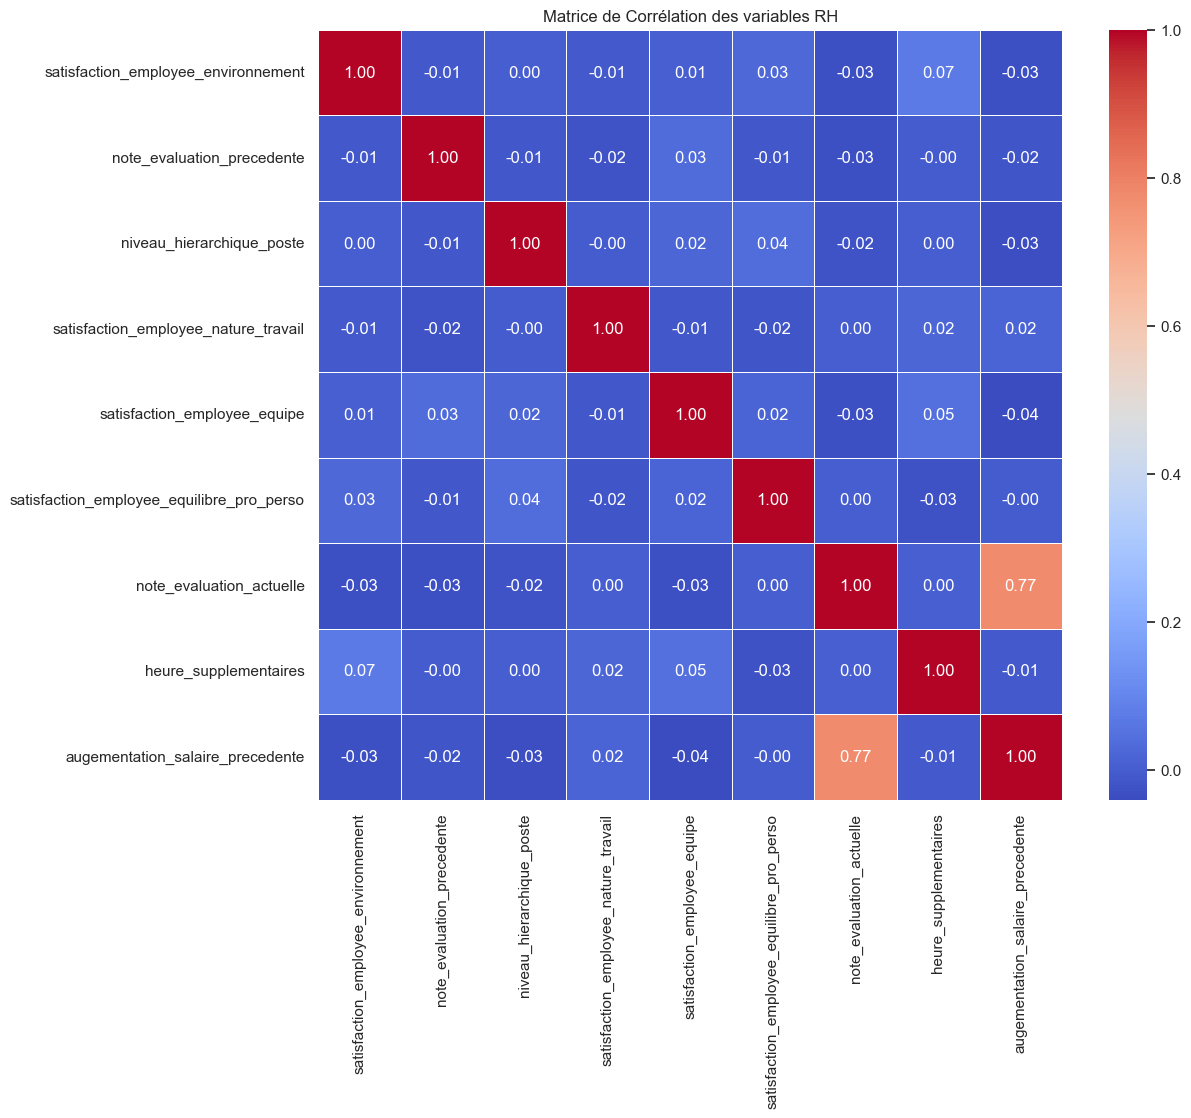

In [38]:
columns = [
    "satisfaction_employee_environnement",
    "note_evaluation_precedente",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "note_evaluation_actuelle",
    "heure_supplementaires",
    "augementation_salaire_precedente",
]

corr_matrix = df_eval[columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des variables RH")